<a href="https://colab.research.google.com/github/leelin-2025/Student-Habits-vs-Academic-Performance/blob/main/Projet_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#instaler pyspark
!pip install findspark
!pip install pyspark
import findspark
import pyspark
findspark.init()

from pyspark.sql import SparkSession

# Créer une session Spark
spark = SparkSession.builder \
    .appName("ProjetFinal") \
    .getOrCreate()

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jayaantanaath/student-habits-vs-academic-performance")

# Chemin du fichier CSV
csv_file_path = path+"/student_habits_performance.csv"

print("Chemin du fichier CSV:", csv_file_path)


Chemin du fichier CSV: /kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv


In [3]:
# installer pandas
!pip install pandas
import pandas as pd

# Lecture du fichier CSV
df = spark.read.csv(csv_file_path, header=True,inferSchema=True)

# Afficher les 20 premières lignes
df.show()

#supression des doublons
df = df.distinct()

# Supression des données aberente (inferieur à 0)
liste  = ['age','study_hours_per_day','social_media_hours','netflix_hours',
          'attendance_percentage','sleep_hours','exercise_frequency',
          'mental_health_rating','exam_score']
for col in liste:
  df = df.filter(df[col]>=0)

#noms et type des colone
print("Noms et types des colones")

df.toPandas().info()


+----------+---+------+-------------------+------------------+-------------+-------------+---------------------+-----------+------------+------------------+------------------------+----------------+--------------------+-----------------------------+----------+
|student_id|age|gender|study_hours_per_day|social_media_hours|netflix_hours|part_time_job|attendance_percentage|sleep_hours|diet_quality|exercise_frequency|parental_education_level|internet_quality|mental_health_rating|extracurricular_participation|exam_score|
+----------+---+------+-------------------+------------------+-------------+-------------+---------------------+-----------+------------+------------------+------------------------+----------------+--------------------+-----------------------------+----------+
|     S1000| 23|Female|                0.0|               1.2|          1.1|           No|                 85.0|        8.0|        Fair|                 6|                  Master|         Average|                   

Data visualisation

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#suppression de la colone student_id
df = df.drop('student_id')

#transformation en dataframe Pandas et copy du dataframe
dfp = df.toPandas()
df_class = dfp.copy()

#liste des colones de type quantitative
num_col = dfp.select_dtypes(exclude='object').columns
num_col = [col for col in num_col]
num_col

['age',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'attendance_percentage',
 'sleep_hours',
 'exercise_frequency',
 'mental_health_rating',
 'exam_score']

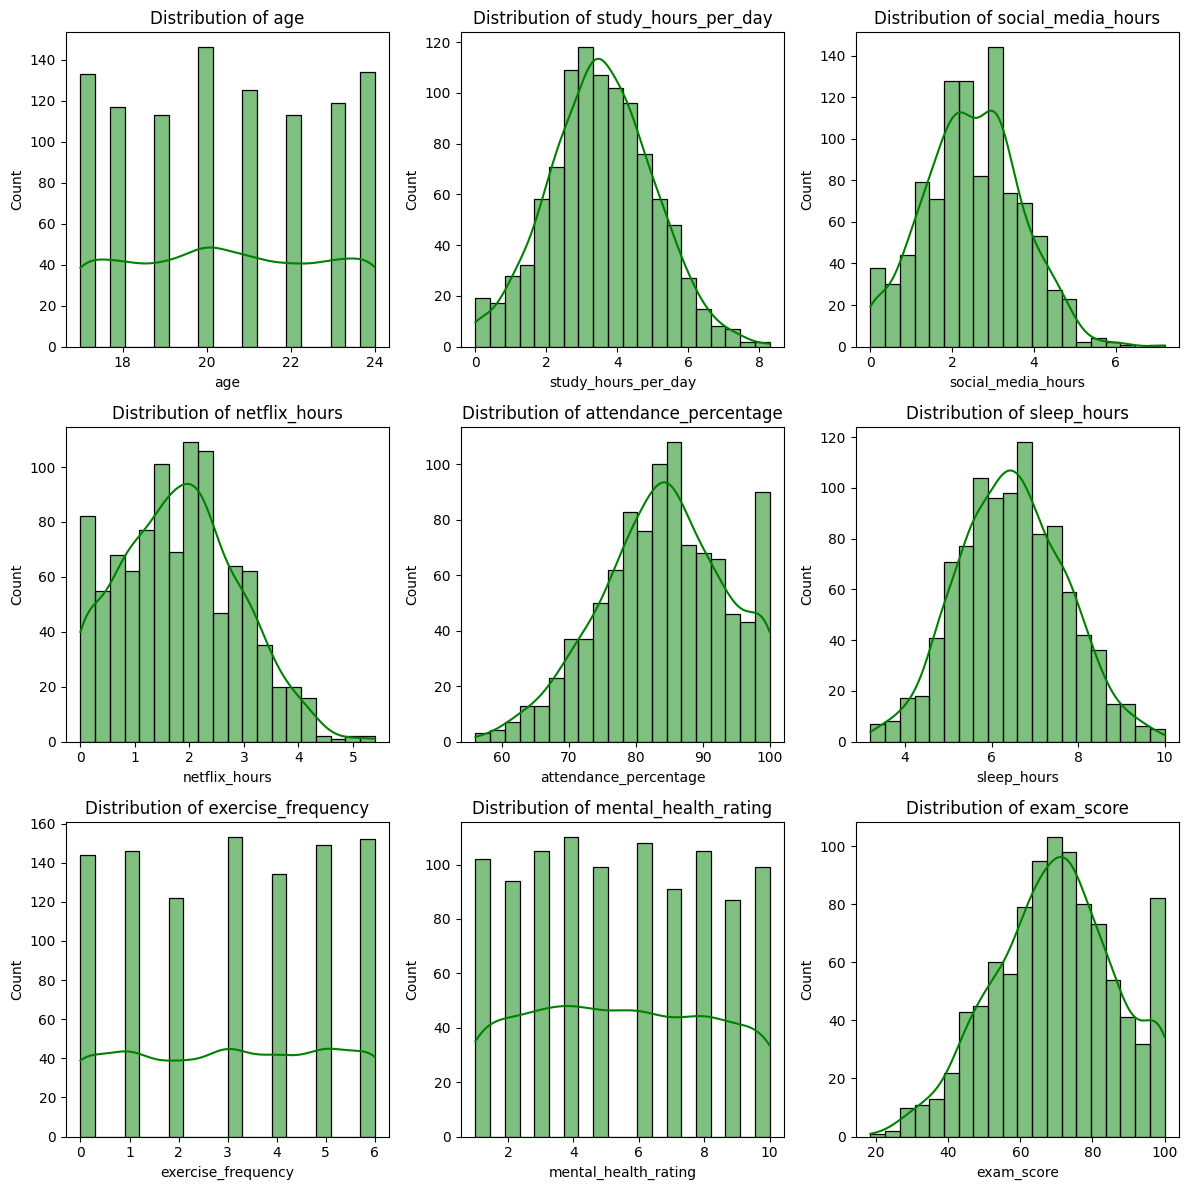

In [5]:
#figure de taille 12x12
plt.figure(figsize=(12,12))

for i in range(9):
    plt.subplot(3, 3, i+1)  # index de subplot comence à 1
    #histogramme de la distribution des données quantitative
    sns.histplot(data=dfp[num_col[i]],bins=20, kde=True, color='green')
    plt.title(f'Distribution of {num_col[i]}')

# Ajutement des espaces entre les graphiquea
plt.tight_layout()

#affichage du graphique
plt.show()

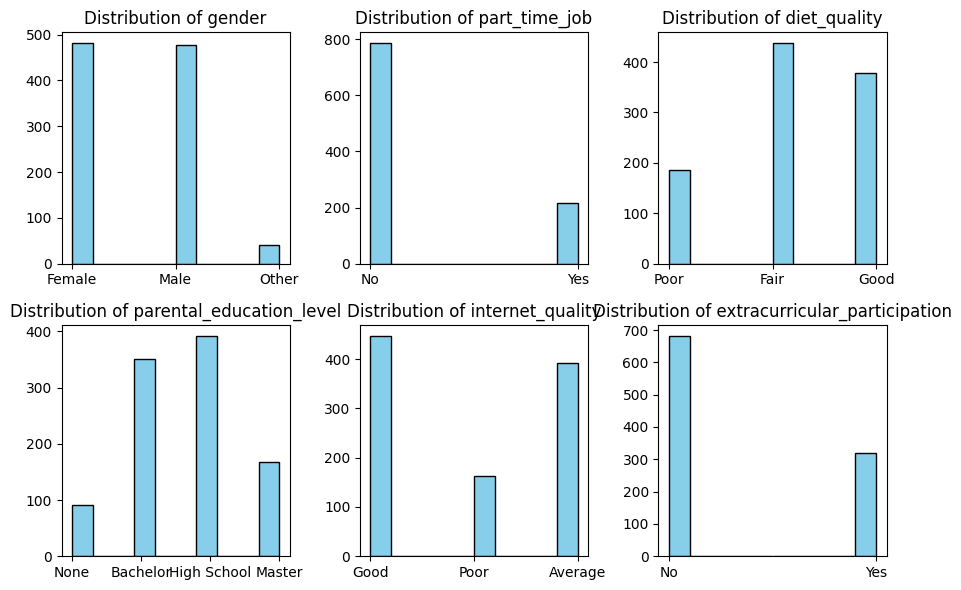

In [6]:
#liste des colones de type qualitative
cat_col = dfp.select_dtypes(include='object').columns
cat_col = [col for col in cat_col]
cat_col

plt.figure(figsize=(9,6))
for i in range(6):
    plt.subplot(2, 3, i+1)  # index de subplot comence à 1
    #histogramme de la distribution des données qualitative
    plt.hist(dfp[cat_col[i]], color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {cat_col[i]}')

#ajustement de l'espace entre les graphique
plt.tight_layout()

#affichage des graphique
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#transformation des donnée qualitatives en donnée quantitative
for col in cat_col:
    dfp[col] = le.fit_transform(dfp[col])
dfp

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,20,0,3.7,1.2,3.3,0,88.5,7.7,2,5,3,1,9,0,82.7
1,21,1,5.5,2.2,0.9,1,84.1,5.0,0,3,0,1,1,0,88.7
2,20,1,2.7,1.9,2.3,0,71.6,7.7,0,3,1,2,8,0,71.2
3,19,1,3.2,1.2,1.2,0,78.6,6.6,0,2,1,2,10,1,81.7
4,20,1,1.8,3.1,3.1,0,72.8,5.3,1,3,1,0,8,0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,17,1,2.8,2.0,4.1,1,82.3,6.3,0,4,1,1,6,0,57.3
996,18,0,2.7,2.7,1.6,0,76.6,4.0,1,0,1,0,3,0,36.9
997,17,0,5.8,3.5,1.9,0,88.7,8.8,0,1,0,1,8,1,90.0
998,24,1,4.1,3.8,1.9,1,84.5,7.6,0,1,0,2,10,0,73.0


<Axes: >

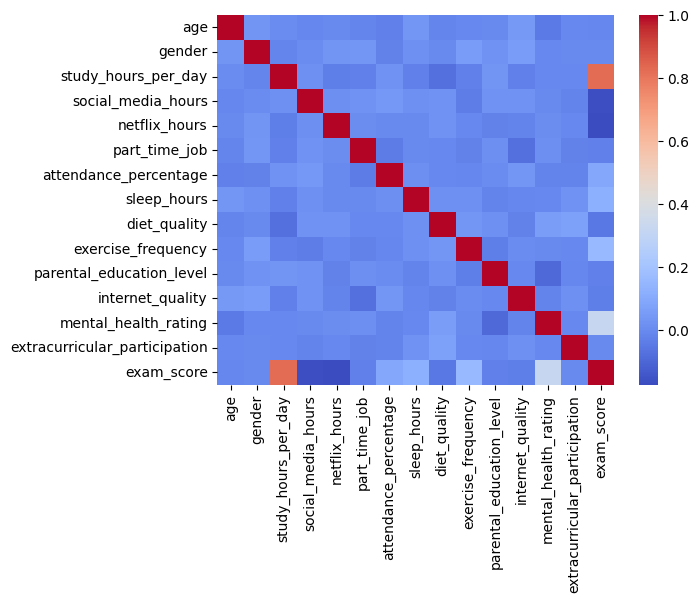

In [8]:
#correlation des données
corr = dfp.corr()
#affichage de la carte de corrélation
sns.heatmap(corr, annot=False,cmap='coolwarm')

In [9]:
#classement des facteurs en fonction de la corrélation (en valeur absolue) au résultat d'examen
corr.abs().sort_values(by=['exam_score'])['exam_score']


,exam_score
extracurricular_participation,0.000881
gender,0.002406
age,0.008907
parental_education_level,0.025821
part_time_job,0.026608
internet_quality,0.032560
diet_quality,0.050275
attendance_percentage,0.089836
sleep_hours,0.121683
exercise_frequency,0.160107


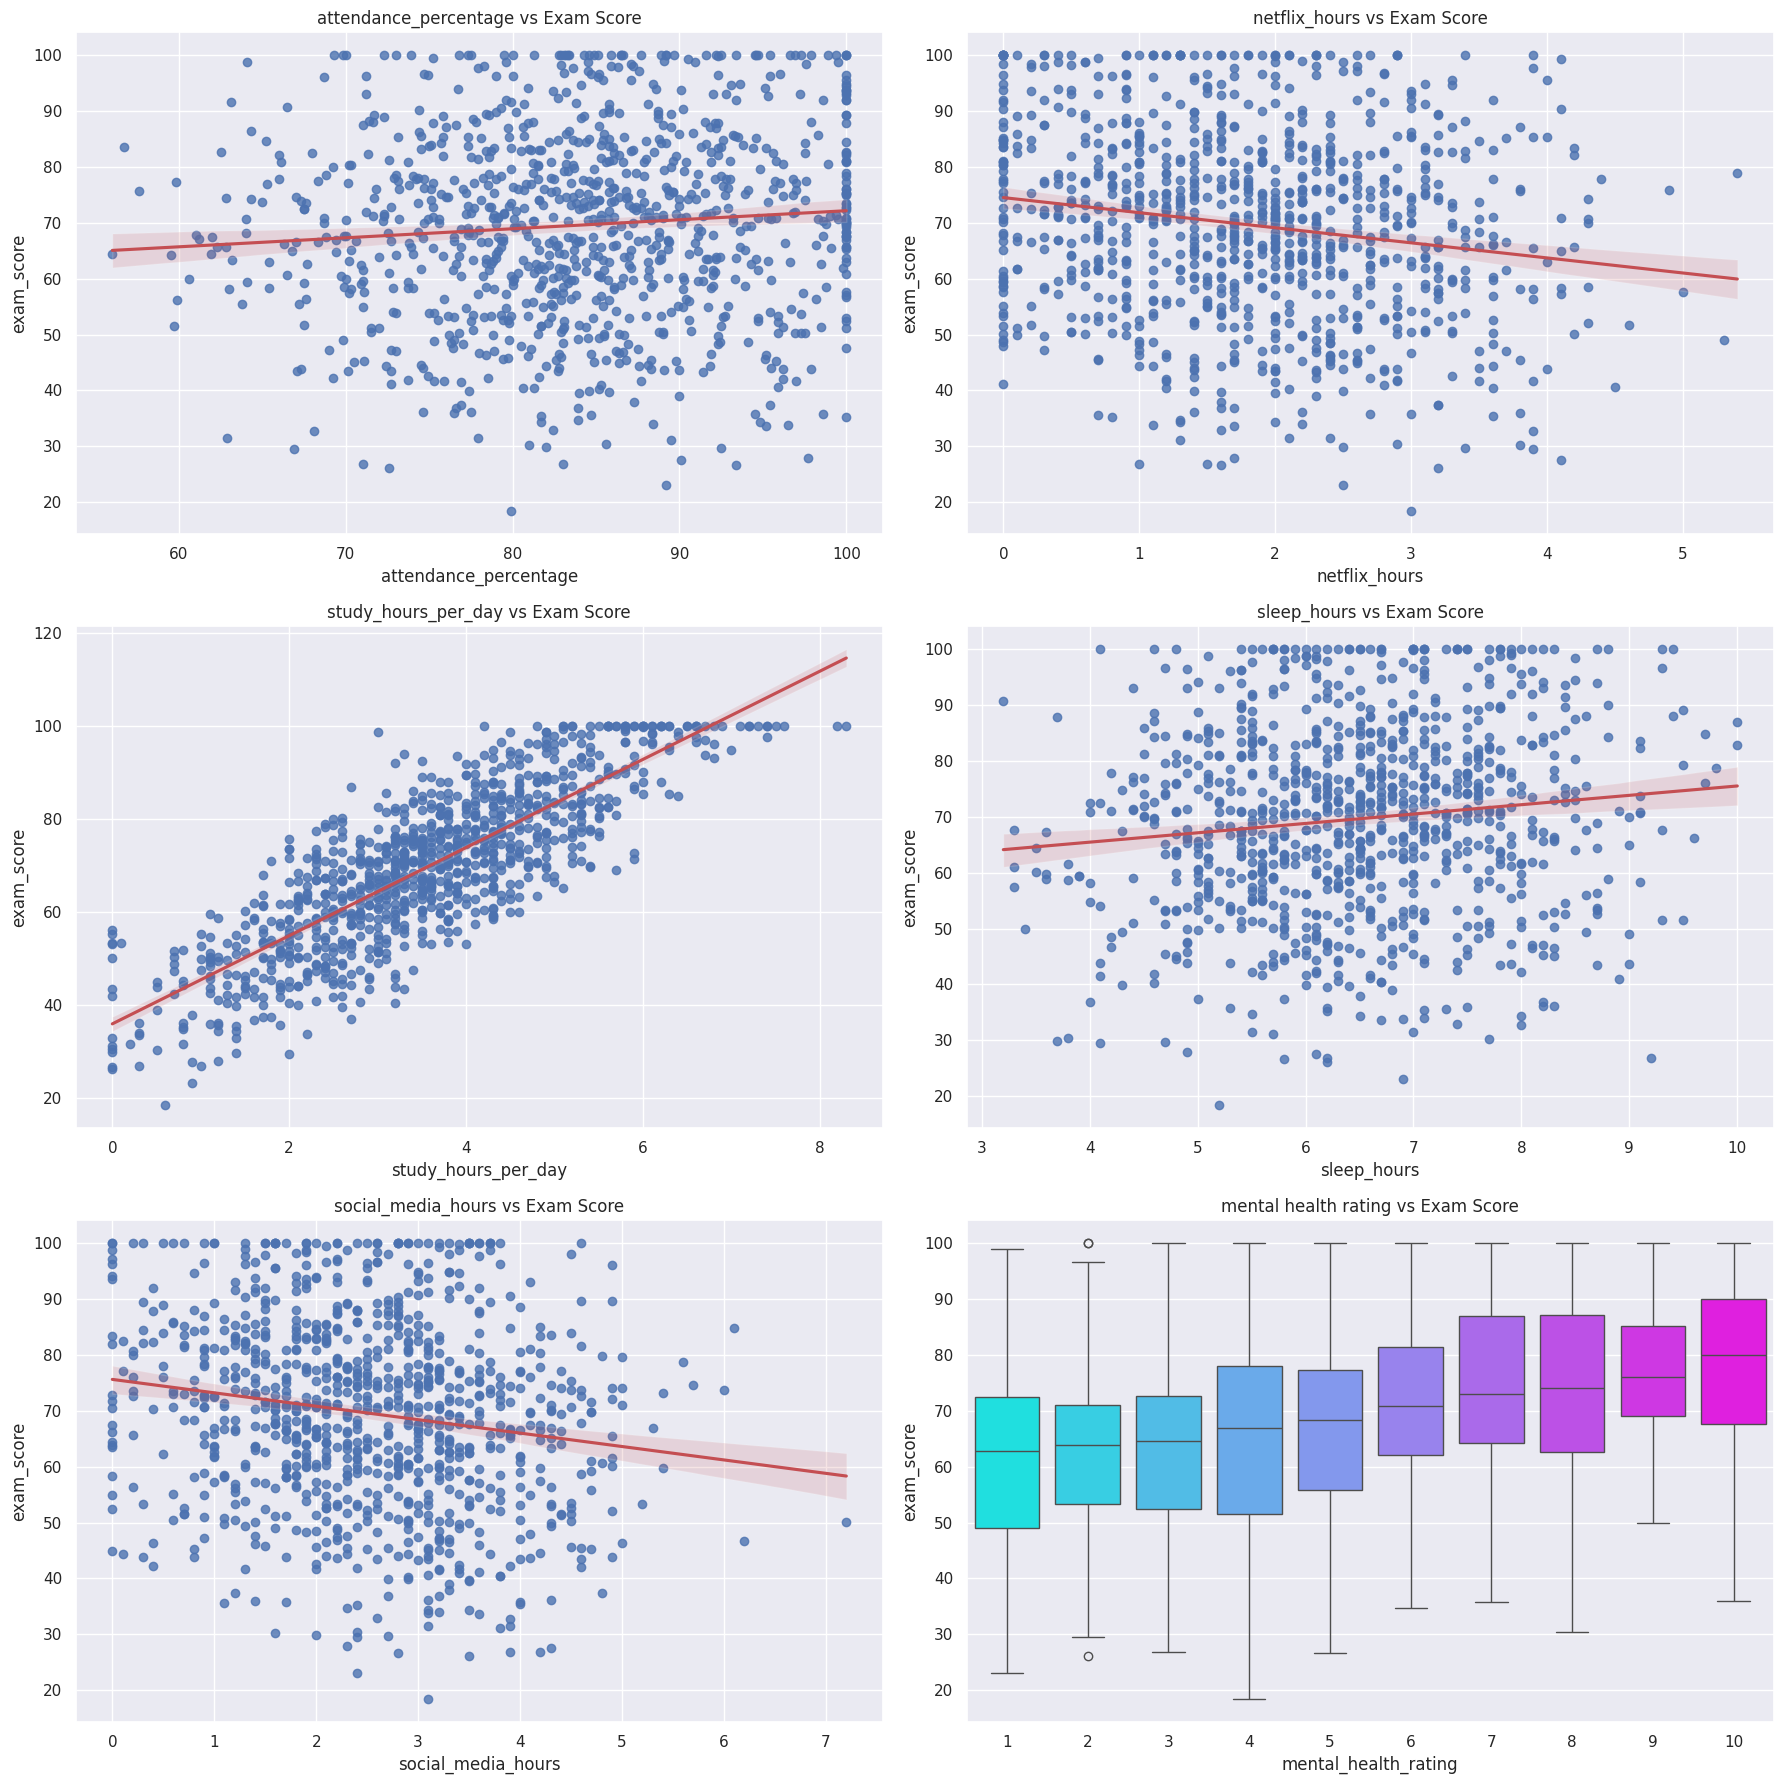

In [10]:
import math
#liste des paramètre à étudier
liste = ['attendance_percentage','sleep_hours',
         'social_media_hours','netflix_hours','study_hours_per_day']
#set les parametre seaborn au defaut
sns.set()

# Crée un graphique avec 3 lignes et 2 collones
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

for i in range(5):
  #modèle de régression linéaire
  sns.regplot(data=df_class, x=liste[i], y='exam_score',line_kws=dict(color="r"),
              ax=axes[i%3,i%2])
  axes[i%3,i%2].set_title(f'{liste[i]} vs Exam Score')#titre du graphique

#graphique en boite à moustache des notes d'exam en fonction du mental health rating
sns.boxplot(data=df_class, x='mental_health_rating', y='exam_score',
            hue= 'mental_health_rating',legend=False, palette='cool',ax=axes[2,1])
axes[2,1].set_title('mental health rating vs Exam Score')

# Ajustement de l'espace entre les graphique
plt.tight_layout()

# Affichage du graphique
plt.show()



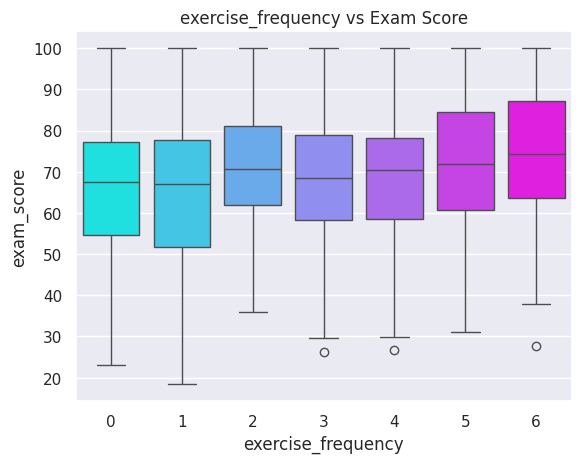

In [11]:
#graphique en boite à moustache des notes d'exam en fonction de la fréquence d'exercice
sns.boxplot(data=df_class, x='exercise_frequency', y='exam_score',
            hue= 'exercise_frequency',legend=False, palette='cool')
plt.title('exercise_frequency vs Exam Score')
plt.show()


In [43]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
import numpy as np

DF=spark.createDataFrame(dfp)

#divise la base de donnée
splits = DF.randomSplit([80.0, 20.0])
train_data=splits[0]
test_data=splits[1]

# Sélectionner les colonnes pertinentes
cols = dfp.drop(columns = ['exam_score']).columns
cols = [col for col in cols]

# et les fusionner pour créer une seule colonne de 'features'
assembler = VectorAssembler(inputCols=cols, outputCol="features")
train_data = assembler.transform(train_data)
test_data = assembler.transform(test_data)

# Créer et entraîner le modèle de régression linéaire
lr = LinearRegression(labelCol="exam_score", featuresCol="features")
model = lr.fit(train_data)

# Faire des prédictions
predictions = model.transform(test_data)

# Afficher les résultats
resultat = predictions.select("exam_score", "prediction").toPandas()
resultat

,exam_score,prediction
0,47.5,53.391541
1,65.0,65.008525
2,80.3,74.128074
3,76.3,74.961342
4,80.6,86.056185
...,...,...
201,69.3,63.054515
202,73.0,80.096099
203,64.2,66.605312
204,96.6,92.789504


Évaluation du model
R²: 0.899
erreur: 5.21
Accuracy: 95.63%


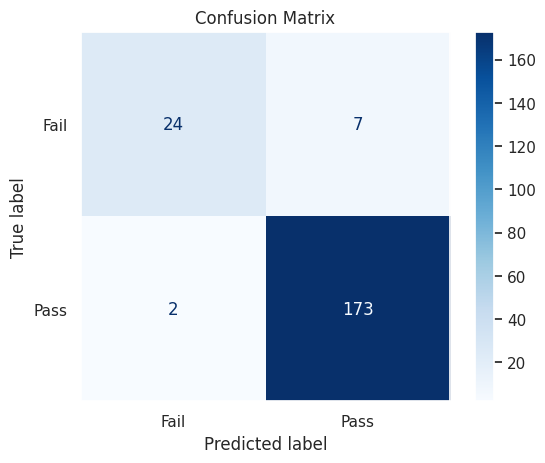

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import root_mean_squared_error, r2_score

print("Évaluation du model")

#Calculer le coefficient de détermination linéaire R².
print(f"R²: {r2_score(resultat['exam_score'], resultat['prediction']):.3f}")

# Calculer l'erreur quadratique moyenne de prédiction
print(f"erreur: {root_mean_squared_error(resultat['exam_score'], resultat['prediction']):.2f}")

#indique si la note est supérieur à 50% (note de passage)
resultat['pass'] = (resultat['exam_score'] >= 50).astype(int)
#indique si la note prédite est supérieur à 50% (note de passage)
resultat['pass_pred'] = (resultat['prediction'] >= 50).astype(int)

#Calcule de la précision du model (pour prédire si l'eleve passe ou coule)
acc = accuracy_score(resultat['pass'], resultat['pass_pred']) * 100
print(f"Précision: {acc:.2f}%")

#matrice de confusion
cm = confusion_matrix(resultat['pass'], resultat['pass_pred'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.grid(visible=False)
plt.show()